In [2]:
from sklearn.datasets import load_digits
from sklearn.model_selection import train_test_split
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn import metrics
df = load_digits()

In [3]:
print("Image Data Shape", df.data.shape)
print("Label Data Shape", df.target.shape)

Image Data Shape (1797, 64)
Label Data Shape (1797,)


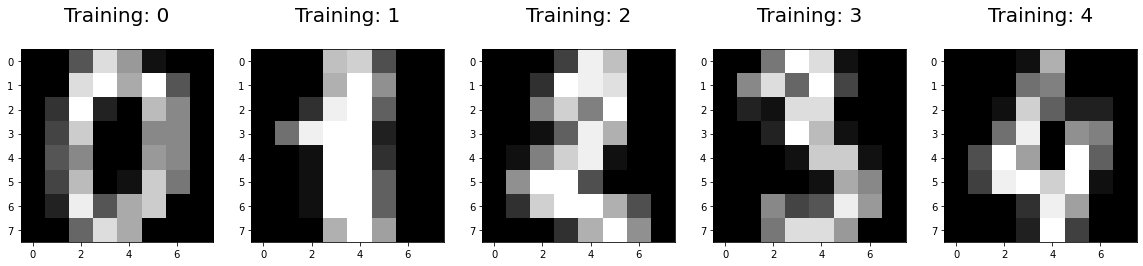

In [7]:
plt.figure(figsize=(20,4))
for index, (image, label) in enumerate(zip(df.data[0:5], df.target[0:5])):
 plt.subplot(1, 5, index + 1)
 plt.imshow(np.reshape(image, (8,8)), cmap=plt.cm.gray)
 plt.title('Training: %i\n' % label, fontsize = 20)

In [17]:
X_train,X_test,y_train,y_test = train_test_split(df.data, df.target, test_size= 0.2, random_state = 2)

In [18]:
print(X_train.shape)

(1437, 64)


In [19]:
print(y_train.shape)

(1437,)


In [20]:
print(X_test.shape)

(360, 64)


In [21]:
print(y_test.shape)

(360,)


In [15]:
from sklearn.linear_model import LogisticRegression

In [23]:
model = LogisticRegression(max_iter = 10000)
model.fit(X_train,y_train)

LogisticRegression(max_iter=10000)

In [27]:
print(model.predict(X_test[0].reshape(1,-1)))

[4]


In [28]:
model.predict(X_test[0:10])

array([4, 0, 9, 1, 8, 7, 1, 5, 1, 6])

In [29]:
pred = model.predict(X_test)

In [34]:
score = model.score(X_test, y_test)
print(score)

0.9416666666666667


In [35]:
cm = metrics.confusion_matrix(y_test,pred)
print(cm)

[[31  0  0  0  1  0  0  0  0  0]
 [ 0 41  0  1  0  0  0  0  1  1]
 [ 0  0 31  0  0  0  0  0  0  0]
 [ 0  0  0 33  0  0  0  2  1  0]
 [ 0  0  0  0 31  0  0  0  3  1]
 [ 0  1  0  0  1 40  0  0  0  1]
 [ 0  1  0  0  0  0 33  0  1  0]
 [ 0  0  0  0  0  0  0 39  0  1]
 [ 0  0  0  0  1  0  0  0 34  1]
 [ 0  0  0  0  0  1  0  0  1 26]]


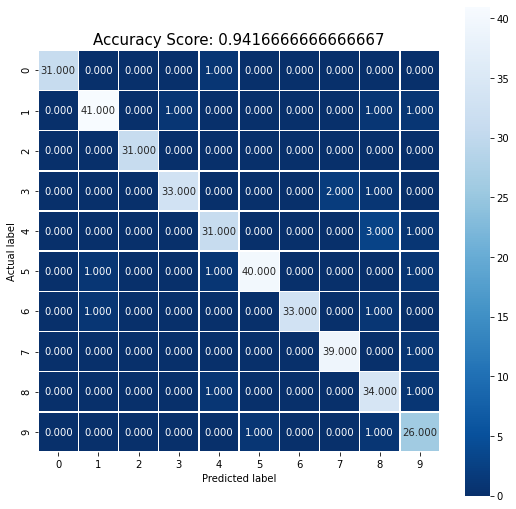

In [36]:
plt.figure(figsize=(9,9))
sns.heatmap(cm, annot=True, fmt=".3f", linewidths=.5, square = True, cmap = 'Blues_r');
plt.ylabel('Actual label');
plt.xlabel('Predicted label');
all_sample_title = 'Accuracy Score: {0}'.format(score)
plt.title(all_sample_title, size = 15);